<a href="https://colab.research.google.com/github/Ersel26/echo_KVAK/blob/main/echo_KVAK_efficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import random
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.optimizers import Adam
from keras.applications import EfficientNetB3

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
DIRECTORY = r"/content/drive/MyDrive/Echo_KVAK/labeled data"
IMG_SIZE = 112 # for EffectiveNetB0
BATCH_SIZE = 32
NUM_CLASSES = len(os.listdir(DIRECTORY))

In [96]:
def create_data_ImageDataGenerator(data_gen, data_dir):
  train_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training'
  ) 
  validation_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation')  # set as validation data
  return (train_generator, validation_generator)

In [104]:
data_gen = ImageDataGenerator(
        #rotation_range=40,
       # width_shift_range=0.2,
        #height_shift_range=0.2,
        rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
        #vertical_flip=True,
        #fill_mode='nearest',
        validation_split=0.2)

(train_generator, validation_generator) = create_data_ImageDataGenerator(data_gen, DIRECTORY)

Found 9213 images belonging to 7 classes.
Found 2302 images belonging to 7 classes.


KeyboardInterrupt: ignored

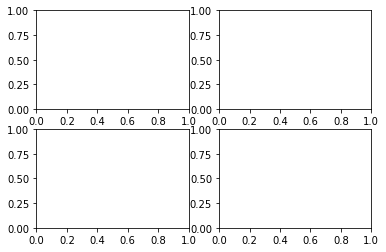

In [98]:
rows = 2
columns = 2
fig, axes = plt.subplots(rows,columns)
for r in range(rows):
    for c in range(columns):
        image_batch = train_generator.next()[0]
        image = image_batch[0].astype('uint8')
        axes[r,c].imshow(image)
fig.set_size_inches(15,10)

In [105]:
efficient_net = EfficientNetB3(
    weights=None,
    input_shape=(IMG_SIZE,IMG_SIZE,1),
    include_top=False,
    pooling='max'
)

model = tf.keras.models.Sequential()
model.add(efficient_net)
model.add(layers.Dense(units = 120, activation='relu'))
model.add(layers.Dense(units = 120, activation = 'relu'))
model.add(layers.Dense(units = NUM_CLASSES, activation='sigmoid'))
model.summary()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10782811  
                                                                 
 dense_24 (Dense)            (None, 120)               184440    
                                                                 
 dense_25 (Dense)            (None, 120)               14520     
                                                                 
 dense_26 (Dense)            (None, 7)                 847       
                                                                 
Total params: 10,982,618
Trainable params: 10,895,319
Non-trainable params: 87,299
_________________________________________________________________


In [106]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(
    train_generator,
    epochs = 50,
    steps_per_epoch = 15,
    validation_data = validation_generator,
    validation_steps = 7,
    callbacks = [callback]
)

Epoch 1/50
 4/15 [=======>......................] - ETA: 52s - loss: 2.7900 - accuracy: 0.2422

KeyboardInterrupt: ignored